<a href="https://colab.research.google.com/github/globalaihub/introduction-to-machine-learning/blob/main/Unsupervised%20Learning/unsupervised_learning.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Clustering

Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

<img src="img/1.png" />

#### Types of Clustering

"Centroid-based Clustering" organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers.

<img src="img/8.png" />

"Density-based Clustering" connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

<img src="img/9.png" />

"Distribution-based Clustering" approach assumes data is composed of distributions, such as Gaussian distributions. In the picture, the distribution-based algorithm clusters data into three Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. The bands show that decrease in probability. When you do not know the type of distribution in your data, you should use a different algorithm.

<img src="img/10.png" />

"Hierarchical clustering" creates a tree of clusters. Hierarchical clustering, not surprisingly, is well suited to hierarchical data, such as taxonomies. 

<img src="img/11.png" />

## K-Means Clustering

The K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean $\mu_j$
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

<img src="https://latex.codecogs.com/gif.latex?\sum&space;min(||x_i&space;-&space;\mu_j||^2)" title="\sum min(||x_i - \mu_j||^2)" /></p>

<img src="img/2.png" />

#Step One

The algorithm randomly chooses a centroid for each cluster. In our example, we choose a k of 3, and therefore the algorithm randomly picks 3 centroids.

<img src="img/4.png" />

#Step Two

The algorithm assigns each point to the closest centroid to get k initial clusters.

<img src="img/5.png" />

#Step Three

For every cluster, the algorithm recomputes the centroid by taking the average of all points in the cluster. The changes in centroids are shown in Figure 3 by arrows. Since the centroids change, the algorithm then re-assigns the points to the closest centroid. Figure 4 shows the new clusters after re-assignment.

<img src="img/6.png" />

#Step Four

The algorithm repeats the calculation of centroids and assignment of points until points stop changing clusters. When clustering large datasets, you stop the algorithm before reaching convergence, using other criteria instead.

<img src="img/7.png" />

#### K Means Parameters : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Mini Batch K-Means

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the example and cited reference.


<img src="img/3.png" />

# Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
#Generate dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=5.5, random_state=42)     

In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [6]:
X_train.shape

(800, 2)

## Plots

In [8]:
sns.set_style("whitegrid")

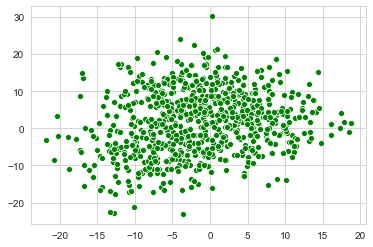

In [13]:
#Scatter plot of train dataset
sns.scatterplot(X_train.T[0], X_train.T[1],color='g')

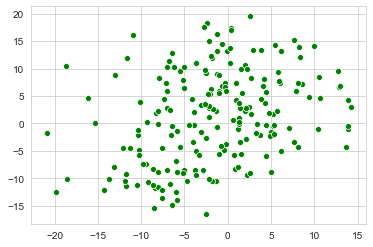

In [19]:
#Scatter plot of test dataset
sns.scatterplot(X_test.T[0], X_test.T[1],color='g')

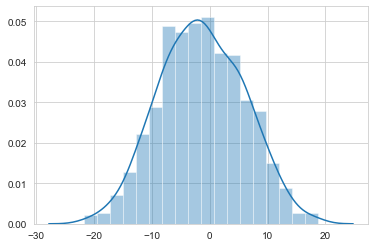

In [20]:
sns.distplot(X_train.T[0])

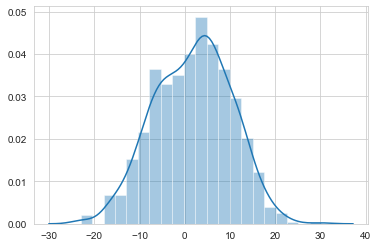

In [21]:
sns.distplot(X_train.T[1])

## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

## Model

In [29]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=1)

In [30]:
model.fit(X_train_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Score

In [32]:
# model score, Opposite of the value of X on the K-means objective.
print("Train score:", model.score(X_train_n))
print("Test score:",model.score(X_test_n))

Train score: -1600.000000000001
Test score: -375.1898042304475


In [33]:
train=[]
test=[]

for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n, y_train)
    
    train.append(model.score(X_train_n, y_train))
    test.append(model.score(X_test_n, y_test))

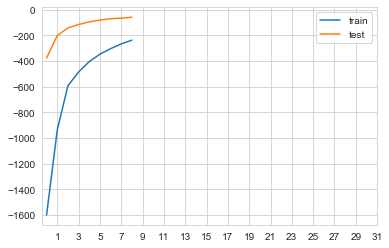

In [34]:
plt.plot(train)
plt.plot(test)
plt.legend(("train", "test"))
plt.xticks(range(1, 33, 2))
plt.show()

## Elbow Method

In [35]:
# Create a list includes inertia for different k values

var = []
for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n)
    
    var.append(model.inertia_)    

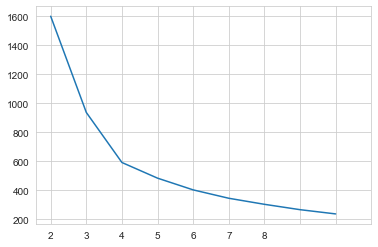

In [37]:
#Elbow Method
plt.plot(var)
plt.xticks(range(10), range(2,9))
plt.show()

### Sihouette Score
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.  

1: Means clusters are well apart from each other and clearly distinguished.  

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.  

-1: Means clusters are assigned in the wrong way.

![](img/sil.jpeg)

Silhouette Score = $\frac{(b-a)}{max(a,b)}$

Where:  
$a$: average intra-cluster distance i.e the average distance between each point within a cluster.  
$b$: average inter-cluster distance i.e the average distance between all clusters.

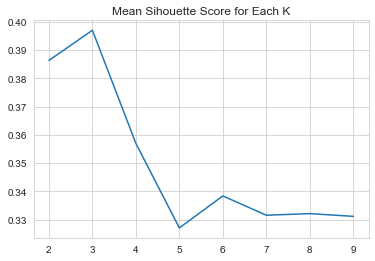

In [38]:
### Code
from sklearn.metrics import silhouette_score

silhouette = []

for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n)
    label=model.predict(X_train_n)
    silhouette.append(silhouette_score(X_train_n,label))
    

ax = plt.plot(silhouette)
plt.xticks(range(8), range(2,10))
plt.title("Mean Sihouette Score for Each K")
plt.show()

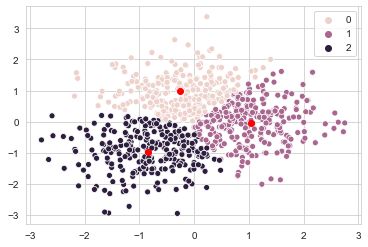

In [39]:
# Final run

model = KMeans(n_clusters=3)
model.fit(X_train_n)

clusters = model.predict(X_train_n)
sns.scatterplot(X_train_n.T[0], X_train_n.T[1], hue=clusters)
plt.scatter(x=model.cluster_centers_[0][0], y=model.cluster_centers_[0][1], color='r')
plt.scatter(x=model.cluster_centers_[1][0], y=model.cluster_centers_[1][1], color='r')
plt.scatter(x=model.cluster_centers_[2][0], y=model.cluster_centers_[2][1], color='r')

In [42]:
#Cluster Centers
model.cluster_centers_

array([[-0.26104373,  0.98223569],
       [ 1.04528306, -0.02746083],
       [-0.84175757, -0.97962535]])

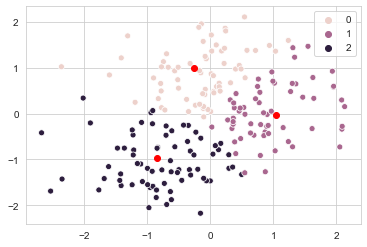

In [43]:
# Clusters on test dataset

cluster_test = model.predict(X_test_n)
sns.scatterplot(X_test_n.T[0], X_test_n.T[1], hue=cluster_test)
plt.scatter(x=model.cluster_centers_[0][0], y=model.cluster_centers_[0][1], color='r')
plt.scatter(x=model.cluster_centers_[1][0], y=model.cluster_centers_[1][1], color='r')
plt.scatter(x=model.cluster_centers_[2][0], y=model.cluster_centers_[2][1], color='r')

## Resources

https://realpython.com/k-means-clustering-python/  